<a href="https://colab.research.google.com/github/nabillaangg/Pemrograman_Python/blob/main/Tugas11python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd/content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [4]:
ls

dataset/  IMG_20200815_201951_HDR.jpg  Tugas11python.ipynb


In [5]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [6]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [7]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((64, 64))) / 255.0
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [8]:
print(labels)

['GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05',

In [9]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [10]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [11]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 64, 64, 3)
(146, 64, 64, 3)


In [12]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

In [13]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
14/14 [==============================] - 1s 77ms/step - loss: 1.6712 - accuracy: 0.2420 - val_loss: 1.5850 - val_accuracy: 0.1986
Epoch 2/25
14/14 [==============================] - 1s 65ms/step - loss: 1.5343 - accuracy: 0.2900 - val_loss: 1.4664 - val_accuracy: 0.4041
Epoch 3/25
14/14 [==============================] - 1s 65ms/step - loss: 1.3950 - accuracy: 0.4178 - val_loss: 1.4136 - val_accuracy: 0.4041
Epoch 4/25
14/14 [==============================] - 1s 65ms/step - loss: 1.2740 - accuracy: 0.4726 - val_loss: 1.2712 - val_accuracy: 0.5274
Epoch 5/25
14/14 [==============================] - 1s 66ms/step - loss: 1.1563 - accuracy: 0.5708 - val_loss: 1.1806 - val_accuracy: 0.5274
Epoch 6/25
14/14 [==============================] - 1s 65ms/step - loss: 1.0506 - accuracy: 0.6005 - val_loss: 1.1826 - val_accuracy: 0.5411
Epoch 7/25
14/14 [==============================] - 1s 66ms/step - loss: 0.9635 - accuracy: 0.6461 - val_loss: 1.0837 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


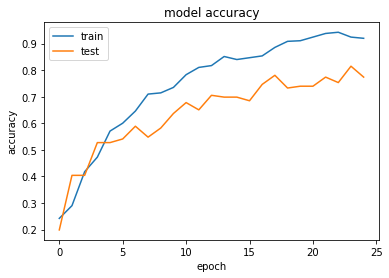

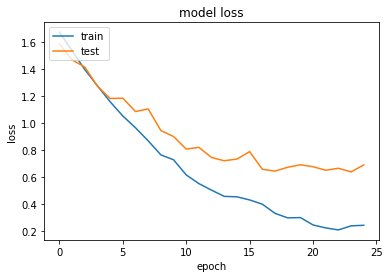

In [14]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.68      0.82      0.75        34
      GMB_02       0.76      0.67      0.71        24
      GMB_03       0.90      0.81      0.85        32
      GMB_04       0.95      0.62      0.75        32
      GMB_05       0.68      0.96      0.79        24

    accuracy                           0.77       146
   macro avg       0.79      0.78      0.77       146
weighted avg       0.80      0.77      0.77       146



In [16]:
model1.save('nnmodel1_dataset')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel1_dataset/assets


In [17]:
import cv2
import matplotlib.pyplot as plt
image1='IMG_20200815_201951_HDR.jpg'

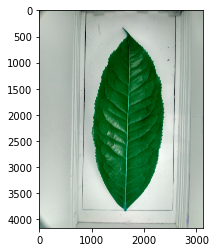

In [18]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [19]:
image_testing = Image.open('IMG_20200815_201951_HDR.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [20]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [21]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[9.9741215e-01 2.2312619e-03 4.7606449e-05 6.5876076e-05 2.4311250e-04]]
['GMB_01']
